In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("seattle-weather.csv")


In [3]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

In [4]:
monthly_temp = df["temp_max"].resample("M").mean()

/tmp/ipython-input-4-2866486507.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df["temp_max"].resample("M").mean()


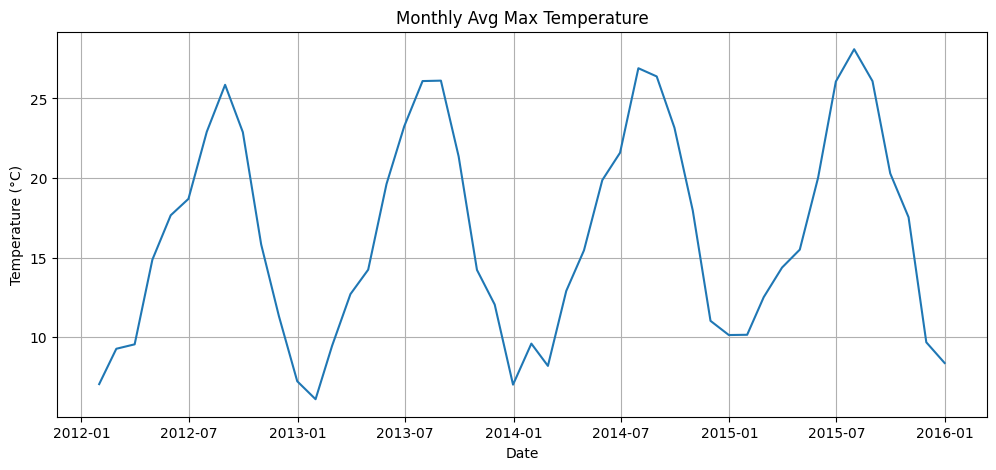

In [7]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_temp)
plt.title("Monthly Avg Max Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

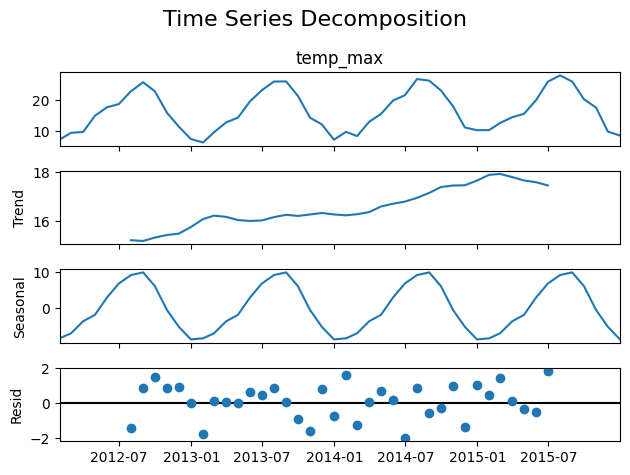

In [8]:
decomposition = seasonal_decompose(monthly_temp, model='additive')
decomposition.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
trend = monthly_temp.rolling(window=3, center=True).mean()

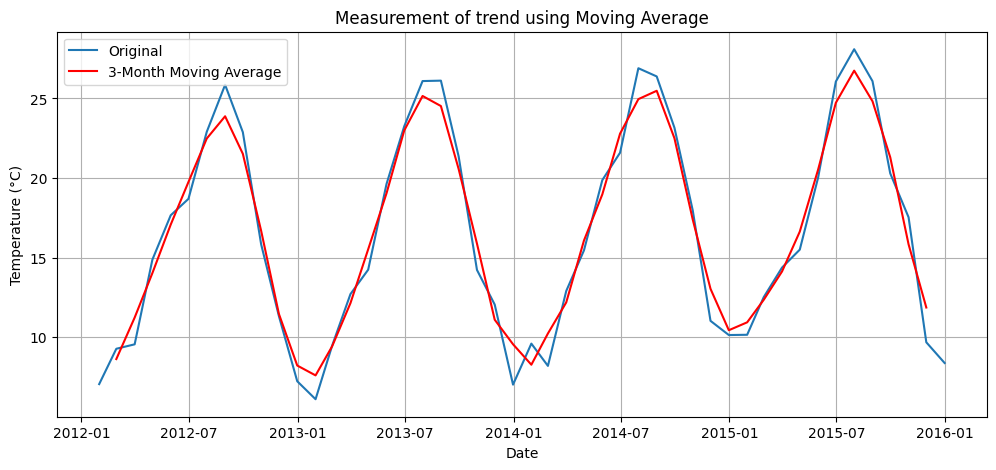

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_temp, label="Original")
plt.plot(trend, label="3-Month Moving Average", color="red")
plt.title("Measurement of trend using Moving Average")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()